## Remove Scalar Outliers

In [19]:
def remove_scalar_outliers(df, c_std_max=2, verbose=False, file='outliers'):    
    '''
        Remove all scalar outliers of all features in a dataframe.
        
        Outlier condition: A value is considered as an outlier, if the absolute value is bigger than the absolute value of the arithmetic mean of a feature plus the absolute value of the standard deviation of a feature times `c_std_max`.
        `c_std_max` (e.g. `1` or `2`) is the amount of standard deviations for each feature value not considered as an outlier. 
        `c_std_max (default 2)` is set to two by default. The value can be specified as a parameter of the function.
        
        Save an infographic as .png-file with `filename` (default `outliers`) specified under `file`-parameter.
        If `verbose=True` (default `false`), show detailed info about outliers removed.
    '''
    
    import pandas as pd
    import numpy as np
    import matplotlib    
    from IPython.display import display, Markdown, Math

    # Helper functions
    def latex(string):
        display(Markdown(rf"""{string}"""))

    def save_fig(fig,file):
        fig.savefig(f'{file}.png',bbox_inches='tight')

    def plot_barh(X,y,file):
        import math
        import matplotlib.pyplot as plt
        fig = plt.figure(figsize=(10,int(math.ceil(len(df.columns)/3))))
        fig.add_subplot() \
            .barh(X,y,color=(0.2, 0.4, 0.6, 0.6))
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        if file:
            save_fig(fig,file)

    def plot_histogram(df):
        import matplotlib.pyplot as plt
        #df = df.loc[df.select_dtypes(include=['number', 'datetime'])]

        fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(12, 48))

        i = 0
        for triaxis in axes:
            for axis in triaxis:
                df.hist(column = df.columns[i], bins = 100, ax=axis)
                i = i+1
        plt.show()   
        
    if verbose:
        latex('## Feature Histograms (with outliers)')
        plot_histogram(df)
        latex('## Removing outliers...')
        
    total_outliers_count = 0
    outlier_counts = []
    outlier_percentages = []
    outliers = []
    
    for feature in df.select_dtypes('number'):
        max_dev = c_std_max*df[feature].std()
        maximum = df[feature].mean() + max_dev
        minimum = df[feature].mean() - max_dev
        outlier_condition = (df[feature] > maximum) | (df[feature] < minimum)
        amount_of_all_values_for_feature = outlier_condition.count()
        if outlier_condition.any():
            if verbose:
                outliers_snapshot = pd.DataFrame([df.loc[
                    outlier_condition,
                    feature
                ].copy().rename(f"removed outliers in feature $$X := $$ {feature}")]).transpose()
                outliers_snapshot['$$x_{min \, new}$$'] = minimum
                outliers_snapshot['$$x_{max \, new}$$'] = maximum
                outliers_snapshot['$$\overline{x} +/- c_{max} * \sigma$$'] = f'{df[feature].mean()} +/- {max_dev}'
                outliers_snapshot['$$\overline{x}$$'] = df[feature].mean()
                outliers_snapshot['$$c_{{\sigma_{{max}}}}$$'] = c_std_max
                outliers_snapshot['$$\sigma$$'] = df[feature].std()
                outliers.append(outliers_snapshot)

            df.loc[outlier_condition, feature] = np.nan
            
            if verbose:
                amount_of_outliers_in_feature = outlier_condition.sum()
                percentage = (amount_of_outliers_in_feature/amount_of_all_values_for_feature)*100
                total_outliers_count += amount_of_outliers_in_feature
                outlier_counts.append(amount_of_outliers_in_feature)
                outlier_percentages.append(rf"$\frac{{{amount_of_outliers_in_feature}}}{{{amount_of_all_values_for_feature}}}$ ($\approx {percentage:.2f} \%$) outliers for $c_{{\sigma_{{max}}}}={c_std_max}$")
                latex(rf"$\frac{{{amount_of_outliers_in_feature}}}{{{amount_of_all_values_for_feature}}}$ (${percentage} \%$) outliers in feature '{feature}' removed.")
        else:
            if verbose:
                outlier_counts.append(0)
                outlier_percentages.append(rf"$0 \%$ outliers for $c_{{\sigma_{{max}}}}={c_std_max}$")
                latex(rf"Outliers in feature $X : = $ '{feature}' (dtype={df[feature].dtype}, mean={df[feature].mean()}, std={df[feature].std()}, n={amount_of_all_values_for_feature})")
                latex(rf"$\forall x \in X : {minimum} <= x <= {maximum}$ (no outliers)")
            else:
                pass
    if any(count != 0 for count in outlier_counts):
        X = [feature + " " + percentage_string for feature, percentage_string in zip(df.select_dtypes('number').columns, outlier_percentages)]
        
        if verbose:
            latex('## Percentages of outliers removed as barchart')
            plot_barh(X, outlier_counts, file)
            
            latex('## Feature Histograms (without outliers)')
            plot_histogram(df)
            
            latex('## All outlier values for all features')
            for feature_outliers in outliers:
                display(feature_outliers)
    return df

## Here goes your own df (`pandas.DataFrame`)

## Feature Histograms (with outliers)

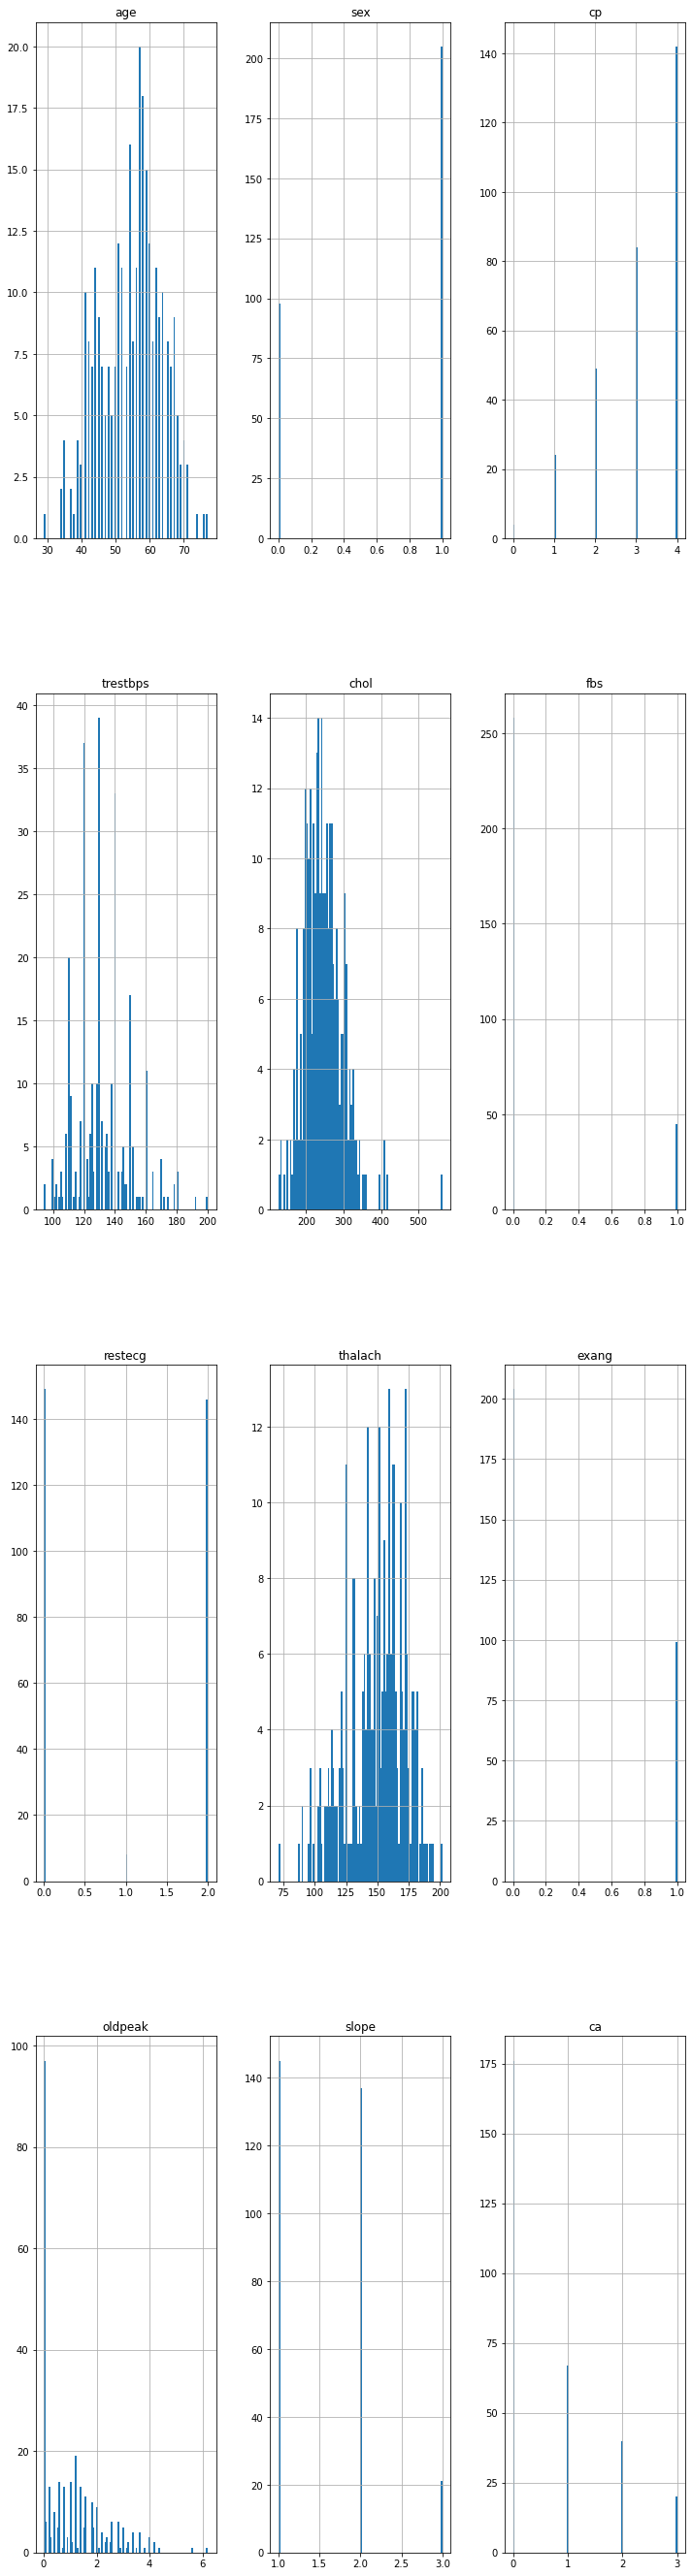

## Removing outliers...

$\frac{10}{303}$ ($3.3003300330033 \%$) outliers in feature 'age' removed.

Outliers in feature $X : = $ 'sex' (dtype=int64, mean=0.6765676567656765, std=0.46855996938568645, n=303)

$\forall x \in X : -0.26055228200569636 <= x <= 1.6136875955370495$ (no outliers)

$\frac{28}{303}$ ($9.24092409240924 \%$) outliers in feature 'cp' removed.

$\frac{15}{303}$ ($4.9504950495049505 \%$) outliers in feature 'trestbps' removed.

$\frac{12}{303}$ ($3.9603960396039604 \%$) outliers in feature 'chol' removed.

$\frac{45}{303}$ ($14.85148514851485 \%$) outliers in feature 'fbs' removed.

Outliers in feature $X : = $ 'restecg' (dtype=int64, mean=0.9900990099009901, std=0.9882928907194962, n=303)

$\forall x \in X : -0.9864867715380023 <= x <= 2.9666847913399828$ (no outliers)

$\frac{10}{303}$ ($3.3003300330033 \%$) outliers in feature 'thalach' removed.

Outliers in feature $X : = $ 'exang' (dtype=int64, mean=0.32673267326732675, std=0.46979446452231716, n=303)

$\forall x \in X : -0.6128562557773076 <= x <= 1.266321602311961$ (no outliers)

$\frac{18}{303}$ ($5.9405940594059405 \%$) outliers in feature 'oldpeak' removed.

$\frac{21}{303}$ ($6.9306930693069315 \%$) outliers in feature 'slope' removed.

$\frac{20}{303}$ ($6.6006600660066 \%$) outliers in feature 'ca' removed.

Outliers in feature $X : = $ 'target' (dtype=int64, mean=0.2739273927392739, std=0.44670992411198407, n=303)

$\forall x \in X : -0.6194924554846942 <= x <= 1.1673472409632422$ (no outliers)

## Percentages of outliers removed as barchart

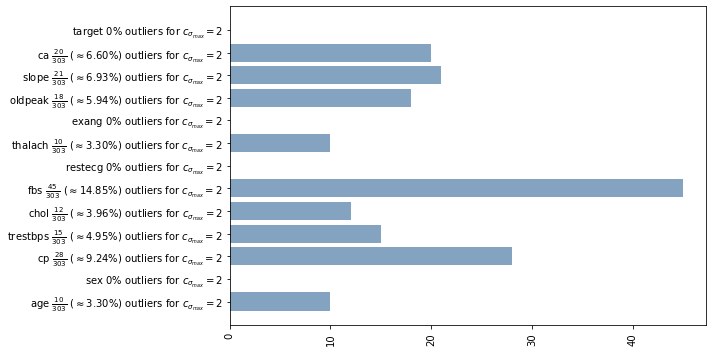

## Feature Histograms (without outliers)

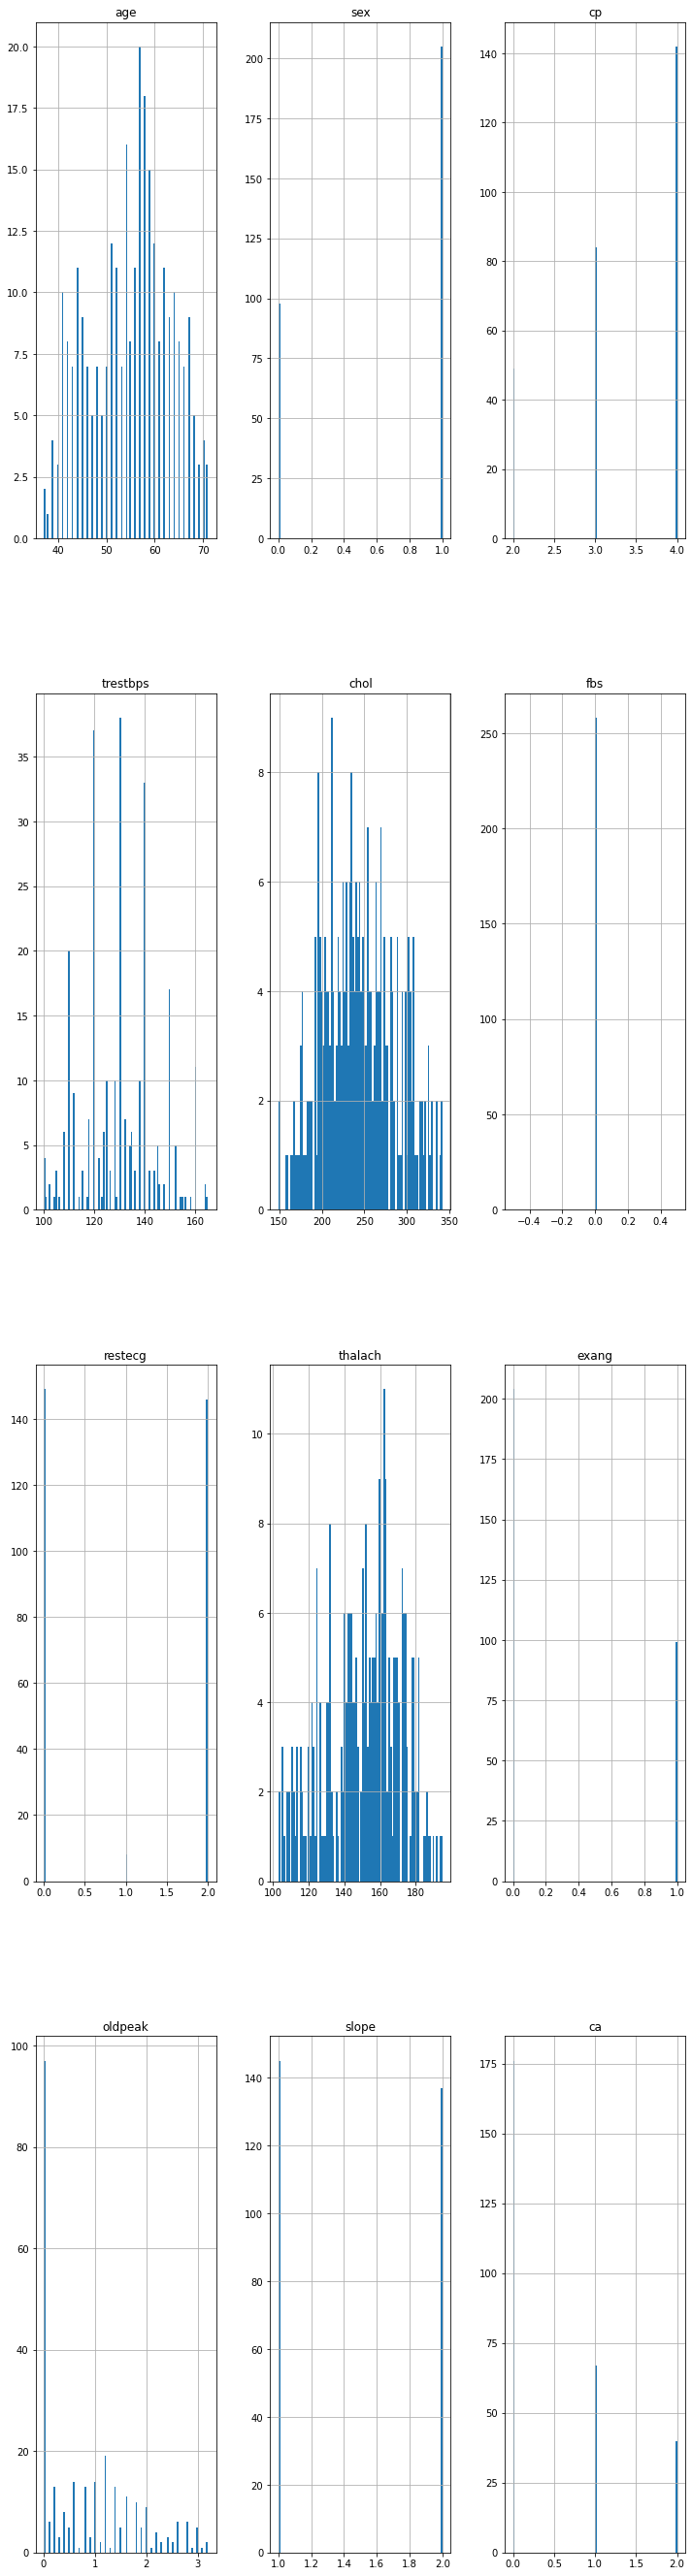

## All outlier values for all features

,removed outliers in feature $$X := $$ age,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
69,35,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
81,29,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
87,35,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
110,77,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
116,35,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
172,34,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
180,74,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
204,76,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
229,35,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637
287,34,36.561319,72.6268,54.59405940594059 +/- 18.032740388515887,54.594059,2,9.01637


,removed outliers in feature $$X := $$ cp,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
0,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
20,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
21,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
27,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
30,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
73,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
90,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
99,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
130,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414
131,1,1.052083,5.165739,3.108910891089109 +/- 2.056828203697131,3.108911,2,1.028414


,removed outliers in feature $$X := $$ trestbps,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
14,172,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
54,180,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
75,200,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
80,94,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
90,170,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
120,174,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
131,178,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
136,192,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
148,180,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338
160,178,96.288803,167.282154,131.78547854785478 +/- 35.49667573384557,131.785479,2,17.748338


,removed outliers in feature $$X := $$ chol,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
7,354,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
38,353,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
46,360,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
63,141,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
101,564,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
121,394,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
129,409,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
149,126,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
245,131,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933
251,131,142.195988,350.899721,246.54785478547853 +/- 104.35186630529816,246.547855,2,52.175933


,removed outliers in feature $$X := $$ fbs,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
0,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
9,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
12,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
14,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
21,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
31,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
39,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
42,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
54,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198
68,1,-0.563881,0.860911,0.1485148514851485 +/- 0.7123957498559518,0.148515,2,0.356198


,removed outliers in feature $$X := $$ thalach,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
43,99,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
66,97,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
81,202,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
103,96,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
123,88,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
170,95,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
191,96,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
192,71,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
241,90,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368
247,90,102.847983,195.541456,149.1947194719472 +/- 46.34673689209525,149.194719,2,23.173368


,removed outliers in feature $$X := $$ oldpeak,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
3,3.5,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
6,3.6,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
61,6.2,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
72,5.6,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
75,4.0,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
131,4.2,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
139,4.2,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
158,3.8,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
178,3.4,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025
211,3.6,-1.272293,3.387805,1.0577557755775573 +/- 2.3300492389629794,1.057756,2,1.165025


,removed outliers in feature $$X := $$ slope,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
0,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
3,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
6,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
9,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
16,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
27,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
61,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
72,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
75,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767
85,3,0.355225,2.826293,1.5907590759075907 +/- 1.2355341789893426,1.590759,2,0.617767


,removed outliers in feature $$X := $$ ca,"$$x_{min \, new}$$","$$x_{max \, new}$$",$$\overline{x} +/- c_{max} * \sigma$$,$$\overline{x}$$,$$c_{{\sigma_{{max}}}}$$,$$\sigma$$
1,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
40,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
61,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
62,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
70,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
95,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
104,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
110,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
124,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773
127,3,-1.192377,2.558714,0.6831683168316832 +/- 1.8755455132827976,0.683168,2,0.937773


In [20]:
# load example dataset <<heart>> from TensorFlow: https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
import tensorflow as tf
import pandas as pd
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')
df = pd.read_csv(csv_file)

df = remove_scalar_outliers(df=df, c_std_max=2, verbose=True, file='outliers-heart')